In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from skimage.draw import draw 
import scipy
#silence DEBUG and WARNINGs
import logging
logging.getLogger('poppy').setLevel(logging.ERROR)
# MagAO-X function definitions
from model_kit import magaoxFunctions as mf
from datetime import date
print('Last date this notebook was ran: {0}'.format(date.today()))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Last date this notebook was ran: 2020-08-04


In [3]:
# declare MagAO-X variables
fr_parm = {'wavelength': 0.9e-6 * u.m,
           'npix': 512, # sample size
           'beam_ratio': 0.25, # oversample
           'leak_mult': 0.01,
           'surf_off': True}

home_dir = '/home/jhen/XWCL/code/MagAOX/' # change for exao0
data_dir = home_dir + 'data/'
vAPP_folder = data_dir+'coronagraph/'

fran_psf = mf.calcFraunhofer_mwfs(fr_parm=fr_parm, pupil_file=data_dir+'MagAOX_f11_pupil_512_unmasked.fits',
                                 vapp_folder=vAPP_folder, write_file=True)

Calculating Leakage PSF
Calculating +phase PSF
Calculating -phase PSF



In [4]:
# initialize the Masking parameters
# move the shifting numbers around based on getting the lowest possible DH contrast
mask_dict = {'mask_size': fr_parm['npix'],
             'cbot_cen': [200, 200],
             'ctop_cen': [317, 312],# [y,x] in ds9
             'c_radius': 70,
             'rect_corner': np.array([149, 55]), # bottom left corner at 0 deg rotation
             'rect_side': np.array([52, 140]), # [y,x] for size in ds9
             'rect_angle': -45,
             'rect_shift_top': [67, 2], # axis [0,1] order (vert, horz)
             'rect_shift_bot': [2, 2] #axis [0, 1] order (vert, horz)
            }
mask_dict.update(fr_parm) # no need to do this if not writing masks to file

psf_top, psf_bot, mask_top, mask_bot = mf.build_mwfs_masks(mask_dict=mask_dict, write_masks=True)
dh_top = mf.calc_mwfs_dh(mwfs_psf=fran_psf, psf_mask=psf_top, dh_mask=mask_top)
dh_bot = mf.calc_mwfs_dh(mwfs_psf=fran_psf, psf_mask=psf_bot, dh_mask=mask_bot)
print('Fraunhofer contrasts for wavelength={0:.1}nm'.format(fr_parm['wavelength'].to(u.um).value))
print('Top contrast: {0:^10.3e}'.format(dh_top))
print('Bot contrast: {0:^10.3e}'.format(dh_bot))

Fraunhofer contrasts for wavelength=0.9nm
Top contrast: 4.439e-06 
Bot contrast: 4.580e-06 


/home/jhen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


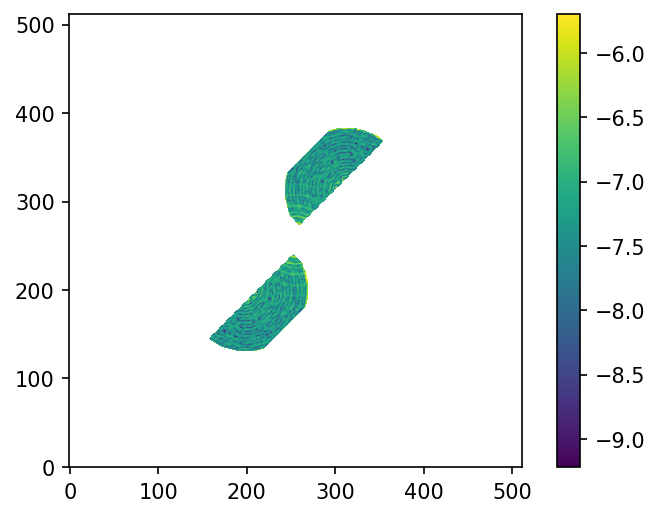

In [5]:
mask_tot = mask_bot + mask_top
mask_test = fran_psf*mask_tot
plt.figure(dpi=150)
plt.imshow(np.log10(mask_test), origin='lower')
plt.colorbar()

In [6]:
# declare MagAO-X variables
fr_parm = {'wavelength': 656.3e-9 * u.m,
           'npix': 512, # sample size
           'beam_ratio': 0.25, # oversample
           'leak_mult': 0.01,
           'surf_off': True}

home_dir = '/home/jhen/XWCL/code/MagAOX/' # change for exao0
data_dir = home_dir + 'data/'
vAPP_folder = data_dir+'coronagraph/'

fran_psf = mf.calcFraunhofer_mwfs(fr_parm=fr_parm, pupil_file=data_dir+'MagAOX_f11_pupil_512_unmasked.fits',
                                 vapp_folder=vAPP_folder, write_file=True)

mask_dict = {'mask_size': fr_parm['npix'],
             'cbot_cen': [200, 200],
             'ctop_cen': [317, 312],# [y,x] in ds9
             'c_radius': 70,
             'rect_corner': np.array([149, 55]), # bottom left corner at 0 deg rotation
             'rect_side': np.array([52, 140]), # [y,x] for size in ds9
             'rect_angle': -45,
             'rect_shift_top': [67, 2], # axis [0,1] order (vert, horz)
             'rect_shift_bot': [2, 2] #axis [0, 1] order (vert, horz)
            }
mask_dict.update(fr_parm) # no need to do this if not writing masks to file

psf_top, psf_bot, mask_top, mask_bot = mf.build_mwfs_masks(mask_dict=mask_dict, write_masks=True)
dh_top = mf.calc_mwfs_dh(mwfs_psf=fran_psf, psf_mask=psf_top, dh_mask=mask_top)
dh_bot = mf.calc_mwfs_dh(mwfs_psf=fran_psf, psf_mask=psf_bot, dh_mask=mask_bot)
print('Fraunhofer contrasts for wavelength={0:.1f}nm'.format(fr_parm['wavelength'].to(u.nm).value))
print('Top contrast: {0:^10.3e}'.format(dh_top))
print('Bot contrast: {0:^10.3e}'.format(dh_bot))

Calculating Leakage PSF
Calculating +phase PSF
Calculating -phase PSF

Fraunhofer contrasts for wavelength=656.3nm
Top contrast: 4.439e-06 
Bot contrast: 4.580e-06 


/home/jhen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


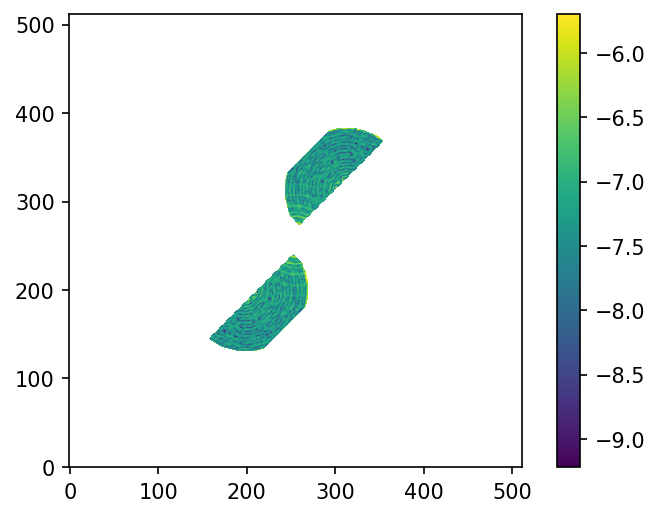

In [7]:
# total mask
mask_tot = mask_bot + mask_top
mask_test = fran_psf*mask_tot
plt.figure(dpi=150)
plt.imshow(np.log10(mask_test), origin='lower')
plt.colorbar()